<a href="https://colab.research.google.com/github/Shahar94/EDA-Project/blob/main/EDA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
census = pd.read_csv('/content/census.csv')
census

#cnt = Number of people using the drug

,year,sex,age,cnt,country
0,2007,F,5-9,164148,DK
1,2007,F,10-14,171864,DK
2,2007,F,15-19,157037,DK
3,2007,M,5-9,172068,DK
4,2007,M,10-14,181190,DK
...,...,...,...,...,...
193,2017,F,15-19,258776,SE
194,2017,F,5-9,297294,SE
195,2017,M,10-14,298557,SE
196,2017,M,15-19,286062,SE


In [3]:
drug_names = pd.read_csv('/content/drug_names.csv')
drug_names

,atc,formalname
0,N06A,Antidepressants
1,N06AA,Non-selective monoamine reuptake inhibitors
2,N06AA01,Desipramine
3,N06AA02,Imipramine
4,N06AA03,Imipramine oxide
...,...,...
64,N06AX22,Agomelatine
65,N06AX23,Desvenlafaxine
66,N06AX24,Vilazodone
67,N06AX25,Hyperici herba


In [4]:
drug_use = pd.read_csv("/content/drug_use.csv")
drug_use.head(20)

#DDD = drug daily dose
#cnt = Number of people using the drug
#ddd_pr_1000 = ddd/cnt
#users_pr_1000 = nusers/cnt

,atc,year,sex,age,nusers,ddd,users_pr_1000,ddd_pr_1000,country,drug_group
0,N06A,2007,F,5-9,43,7000.0,0.261959,42.644444,DK,AD
1,N06A,2007,M,5-9,98,17000.0,0.569542,98.798149,DK,AD
2,N06A,2007,F,10-14,653,191000.0,3.799516,1111.343872,DK,AD
3,N06A,2007,M,10-14,581,175000.0,3.206579,965.836975,DK,AD
4,N06A,2007,F,15-19,5578,1499000.0,35.520290,9545.521484,DK,AD
5,N06A,2007,M,15-19,2429,645000.0,14.651595,3890.604736,DK,AD
6,N06AA,2007,F,5-9,9,0.0,0.054829,0.000000,DK,TCA
7,N06AA,2007,M,5-9,27,0.0,0.156915,0.000000,DK,TCA
8,N06AA,2007,F,10-14,43,1000.0,0.250198,5.818554,DK,TCA
9,N06AA,2007,M,10-14,50,3000.0,0.275953,16.557205,DK,TCA


In [5]:
drug_use['drug_group'].unique()

#TCA - Tricyclic Antidepressant

array(['AD', 'TCA', 'SSRI', 'N06AF', 'N06AG', 'Other'], dtype=object)

In [6]:
drug_use['atc'].unique()

array(['N06A', 'N06AA', 'N06AA01', 'N06AA02', 'N06AA04', 'N06AA05',
       'N06AA06', 'N06AA07', 'N06AA08', 'N06AA09', 'N06AA10', 'N06AA11',
       'N06AA12', 'N06AA16', 'N06AA17', 'N06AA21', 'N06AB', 'N06AB03',
       'N06AB04', 'N06AB05', 'N06AB06', 'N06AB08', 'N06AB10', 'N06AF',
       'N06AF01', 'N06AF03', 'N06AF04N06AG', 'N06AG', 'N06AG02', 'N06AX',
       'N06AX01', 'N06AX02', 'N06AX03', 'N06AX05', 'N06AX06', 'N06AX09',
       'N06AX11', 'N06AX12', 'N06AX14', 'N06AX16', 'N06AX17', 'N06AX18',
       'N06AX21', 'N06AX22', 'N06AX23', 'N06AX24', 'N06AX25', 'N06AX26',
       'N06AF04'], dtype=object)

# **Data Preparation**

In [7]:
atc_values = ['N06A', 'N06AA', 'N06AB', 'N06AF', 'N06AG', 'N06AX']

clean_data = drug_use[~drug_use['atc'].isin(atc_values)]
clean_data.head(20)

,atc,year,sex,age,nusers,ddd,users_pr_1000,ddd_pr_1000,country,drug_group
12,N06AA01,2007,F,5-9,0,0.0,0.000000,0.000000,DK,TCA
13,N06AA01,2007,M,5-9,0,0.0,0.000000,0.000000,DK,TCA
14,N06AA01,2007,F,10-14,0,0.0,0.000000,0.000000,DK,TCA
15,N06AA01,2007,M,10-14,0,0.0,0.000000,0.000000,DK,TCA
16,N06AA01,2007,F,15-19,0,0.0,0.000000,0.000000,DK,TCA
17,N06AA01,2007,M,15-19,0,0.0,0.000000,0.000000,DK,TCA
18,N06AA02,2007,F,5-9,3,0.0,0.018276,0.000000,DK,TCA
19,N06AA02,2007,M,5-9,17,0.0,0.098798,0.000000,DK,TCA
20,N06AA02,2007,F,10-14,19,0.0,0.110553,0.000000,DK,TCA
21,N06AA02,2007,M,10-14,28,1000.0,0.154534,5.519068,DK,TCA


In [8]:
clean_data.describe()
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8448 entries, 12 to 9578
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   atc            8448 non-null   object 
 1   year           8448 non-null   int64  
 2   sex            8448 non-null   object 
 3   age            8448 non-null   object 
 4   nusers         8448 non-null   int64  
 5   ddd            8448 non-null   float64
 6   users_pr_1000  8448 non-null   float64
 7   ddd_pr_1000    8448 non-null   float64
 8   country        8448 non-null   object 
 9   drug_group     8448 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 726.0+ KB


In [9]:
clean_data['ddd_pr_1000'].describe()

count     8448.000000
mean        67.805918
std        443.705972
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      12677.188477
Name: ddd_pr_1000, dtype: float64

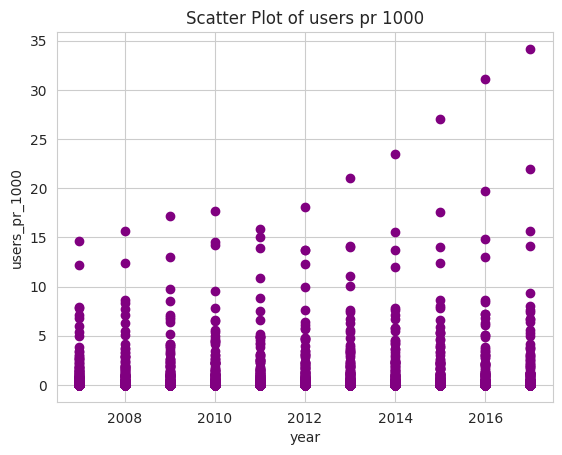

In [26]:
users_pr_1000 = clean_data['users_pr_1000']
year = clean_data['year']

plt.scatter(year, users_pr_1000, color='purple')

plt.xlabel('year')
plt.ylabel('users_pr_1000')
plt.title('Scatter Plot of users pr 1000')
plt.show()

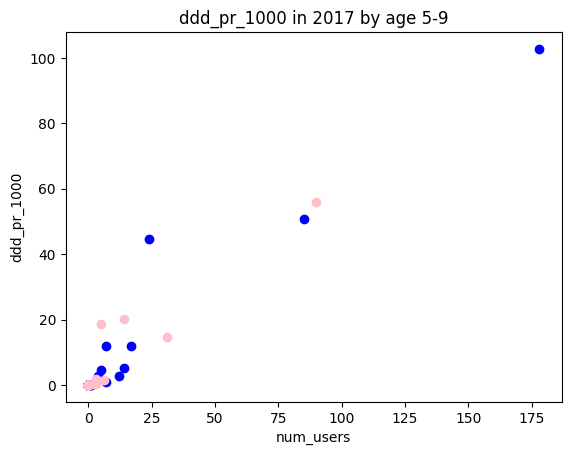

In [11]:
ages_5_9 = clean_data[clean_data['age'] == '5-9']
data_2017 = ages_5_9[ages_5_9['year'] == 2017]
male = data_2017[data_2017['sex'] == 'M']
female = data_2017[data_2017['sex'] == 'F']

# Extract the variables for the scatter plot
male_users = male['nusers']
male_ddd_pr_1000 = male['ddd_pr_1000']
female_users = female['nusers']
female_ddd_pr_1000 = female['ddd_pr_1000']

# Create separate scatter plots for men and women
plt.scatter(male_users, male_ddd_pr_1000, color='blue', label='Male')
plt.scatter(female_users, female_ddd_pr_1000, color='pink', label='Female')

plt.xlabel('num_users')
plt.ylabel('ddd_pr_1000')
plt.title('ddd_pr_1000 in 2017 by age 5-9')
plt.show()

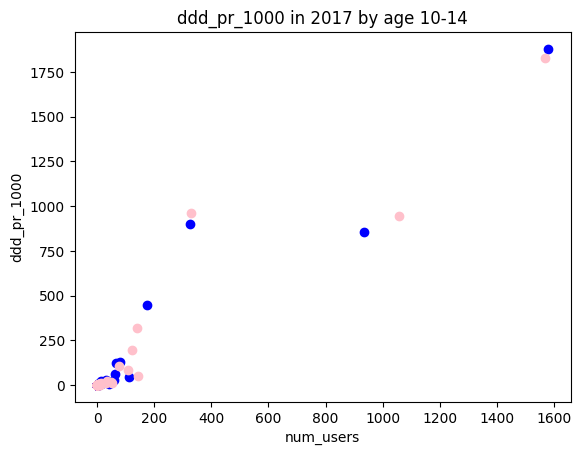

In [12]:
ages_10_14 = clean_data[clean_data['age'] == '10-14']
data_2017 = ages_10_14[ages_10_14['year'] == 2017]
male = data_2017[data_2017['sex'] == 'M']
female = data_2017[data_2017['sex'] == 'F']

male_users = male['nusers']
male_ddd_pr_1000 = male['ddd_pr_1000']
female_users = female['nusers']
female_ddd_pr_1000 = female['ddd_pr_1000']

plt.scatter(male_users, male_ddd_pr_1000, color='blue', label='Male')
plt.scatter(female_users, female_ddd_pr_1000, color='pink', label='Female')

plt.xlabel('num_users')
plt.ylabel('ddd_pr_1000')
plt.title('ddd_pr_1000 in 2017 by age 10-14')
plt.show()

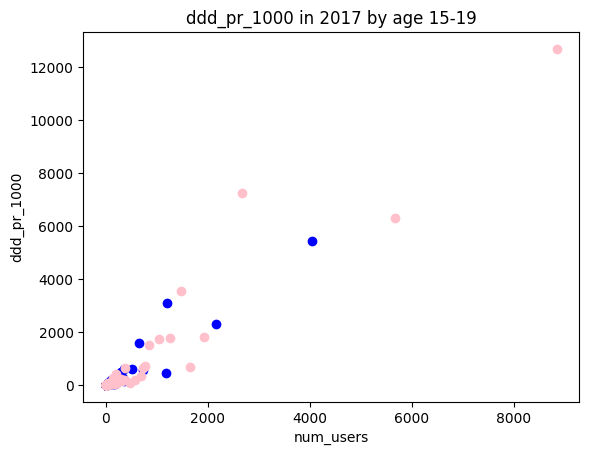

In [13]:
ages_15_19 = clean_data[clean_data['age'] == '15-19']
data_2017 = ages_15_19[ages_15_19['year'] == 2017]
male = data_2017[data_2017['sex'] == 'M']
female = data_2017[data_2017['sex'] == 'F']

male_users = male['nusers']
male_ddd_pr_1000 = male['ddd_pr_1000']
female_users = female['nusers']
female_ddd_pr_1000 = female['ddd_pr_1000']

plt.scatter(male_users, male_ddd_pr_1000, color='blue', label='Male')
plt.scatter(female_users, female_ddd_pr_1000, color='pink', label='Female')

plt.xlabel('num_users')
plt.ylabel('ddd_pr_1000')
plt.title('ddd_pr_1000 in 2017 by age 15-19')
plt.show()

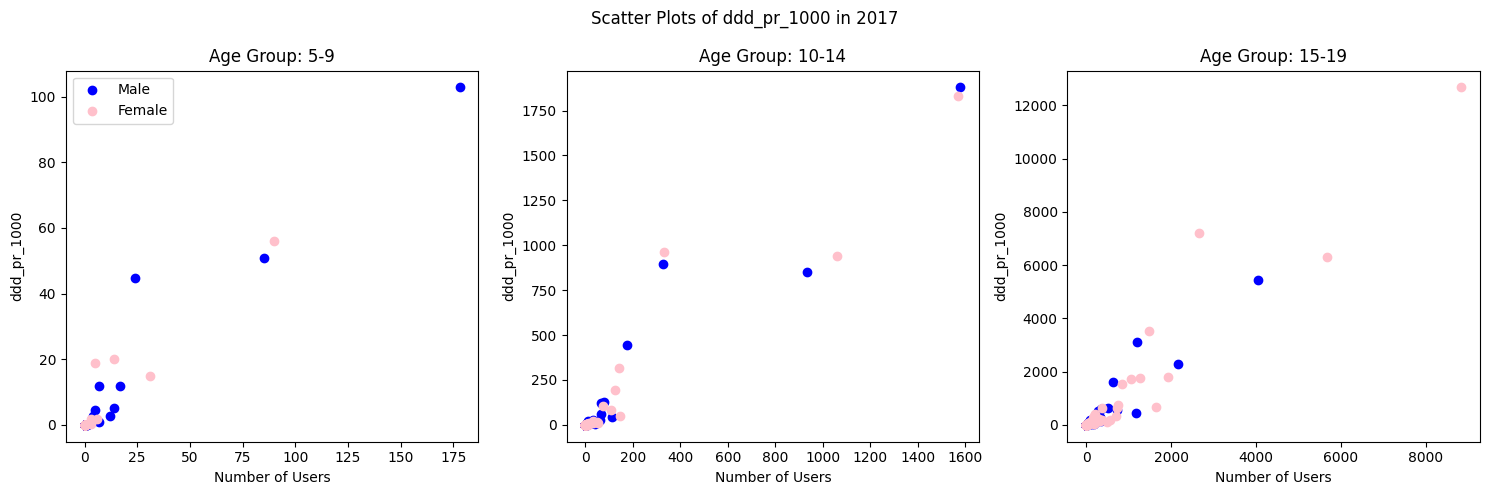

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

age_groups = ['5-9', '10-14', '15-19']
titles = ['Age Group: 5-9', 'Age Group: 10-14', 'Age Group: 15-19']

for i, age_group in enumerate(age_groups):
    # Filter the data for the current age group and the year 2017
    age_data = clean_data[clean_data['age'] == age_group]
    data_2017 = age_data[age_data['year'] == 2017]

    male = data_2017[data_2017['sex'] == 'M']
    female = data_2017[data_2017['sex'] == 'F']

    male_users = male['nusers']
    male_ddd_pr_1000 = male['ddd_pr_1000']
    female_users = female['nusers']
    female_ddd_pr_1000 = female['ddd_pr_1000']

    # Create a scatter plot for the current age group
    ax = axes[i]
    ax.scatter(male_users, male_ddd_pr_1000, color='blue', label='Male')
    ax.scatter(female_users, female_ddd_pr_1000, color='pink', label='Female')

    # Set the title for the current age group plot
    ax.set_title(titles[i])

    if i == 0:
      ax.legend()

    ax.set_xlabel('Number of Users')
    ax.set_ylabel('ddd_pr_1000')

fig.suptitle('Scatter Plots of ddd_pr_1000 in 2017')
fig.tight_layout()
plt.show()

<ipython-input-15-0c629a132584>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = clean_data.corr()


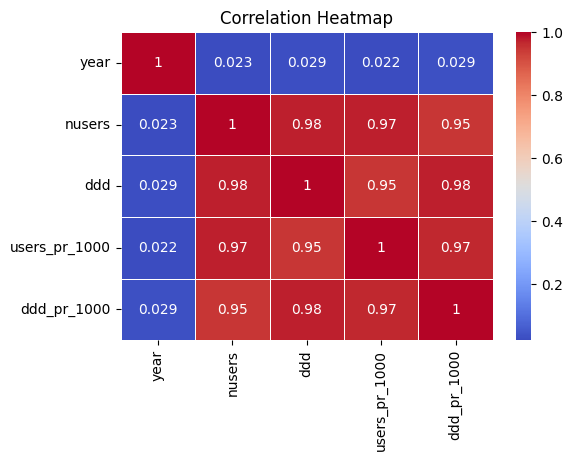

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = clean_data.corr()

# Create the correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap')

plt.show()

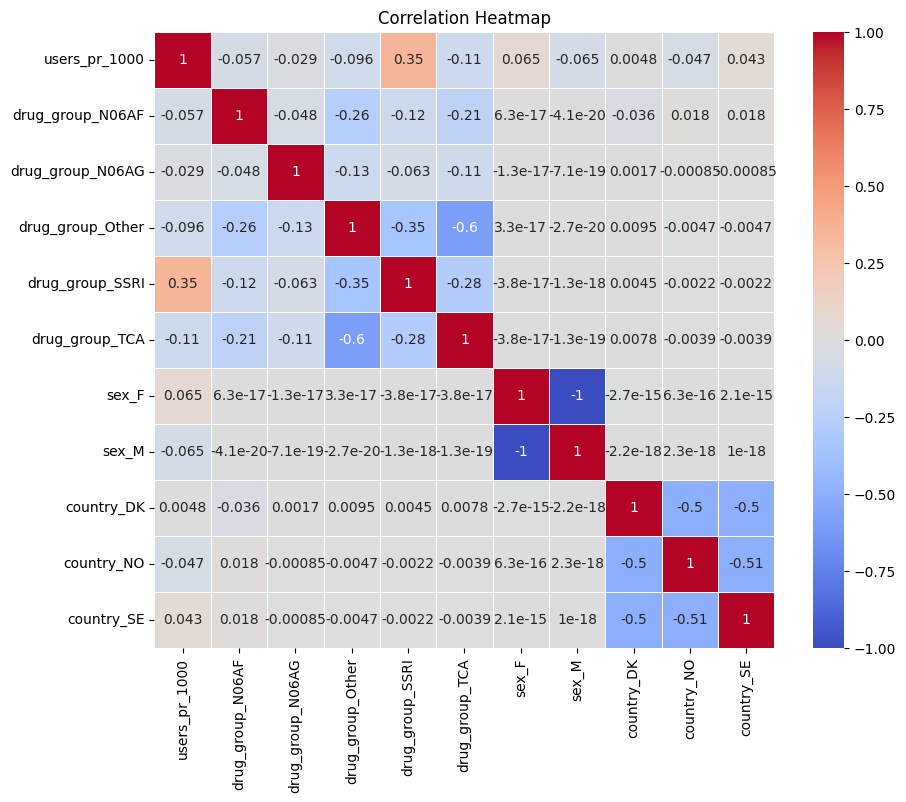

In [16]:
selected_columns = ['users_pr_1000', 'drug_group', 'sex', 'country']

# Subset the DataFrame with selected columns
subset_data = clean_data[selected_columns]

# Convert categorical variables to numeric representation
encoded_data = pd.get_dummies(subset_data)

correlation_matrix = encoded_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap')

plt.show()

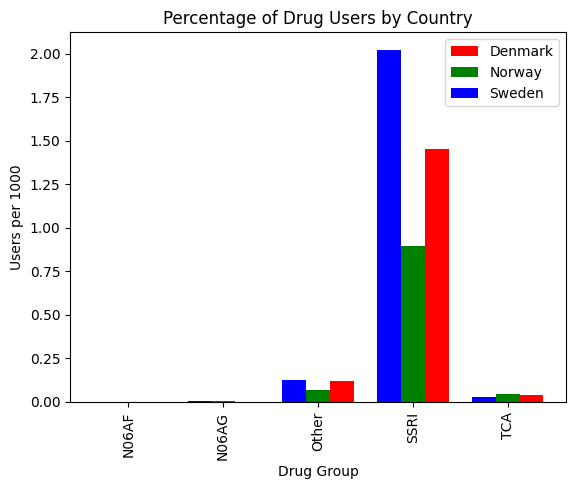

In [17]:
# Comparing the drug using different types of antidepressants drug using in each country

drug_users = drug_use['users_pr_1000']
age = drug_use['age']
drug_group = drug_use['drug_group']

pivot_df = clean_data.pivot_table(values= 'users_pr_1000', index= 'drug_group', columns= 'country')
pivot_df = pivot_df.fillna(0)

x_index = np.arange(len(pivot_df))
width = 0.25

plt.bar(x_index + width, pivot_df['DK'], width=width, color='r', label='Denmark')
plt.bar(x_index, pivot_df['NO'], width=width, color='g', label='Norway')
plt.bar(x_index - width, pivot_df['SE'], width=width, color='b', label='Sweden')

plt.xticks(ticks=x_index, labels=pivot_df.index, rotation='vertical')

plt.xlabel('Drug Group')
plt.ylabel('Users per 1000')
plt.title('Percentage of Drug Users by Country')

plt.legend()
plt.show()

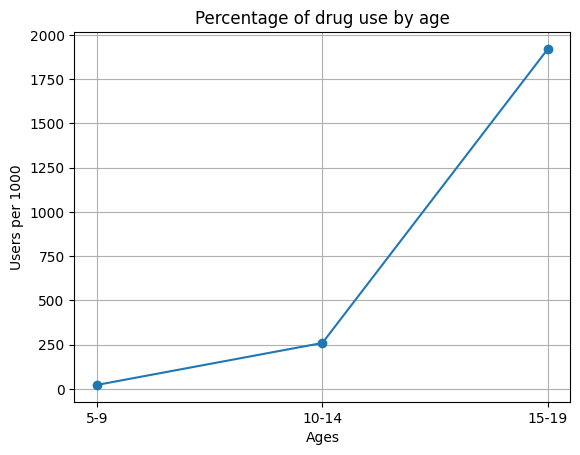

In [18]:
sum_5_9 = clean_data.loc[clean_data['age'] == '5-9', 'users_pr_1000'].sum()
sum_10_14 = clean_data.loc[clean_data['age'] == '10-14', 'users_pr_1000'].sum()
sum_15_19 = clean_data.loc[clean_data['age'] == '15-19', 'users_pr_1000'].sum()

age_groups = ["5-9", "10-14","15-19"]
drug_users = [sum_5_9,sum_10_14,sum_15_19]

plt.plot(age_groups, drug_users, marker="o")
plt.xlabel("Ages")
plt.ylabel("Users per 1000")
plt.title("Percentage of drug use by age")
plt.grid(True)
plt.show()

In [19]:
# Comparing the age of those using different types of antidepressants

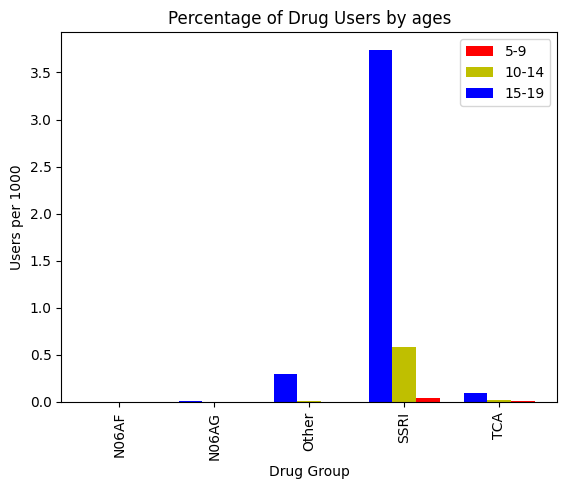

In [20]:
pivot_df = clean_data.pivot_table(values= 'users_pr_1000', index= 'drug_group', columns= 'age')
pivot_df = pivot_df.fillna(0)

x_index = np.arange(len(pivot_df))
width = 0.25

plt.bar(x_index + width, pivot_df['5-9'], width=width, color='r', label='5-9')
plt.bar(x_index, pivot_df['10-14'], width=width, color='y', label='10-14')
plt.bar(x_index - width, pivot_df['15-19'], width=width, color='b', label='15-19')

plt.xticks(ticks=x_index, labels=pivot_df.index, rotation='vertical')

plt.xlabel('Drug Group')
plt.ylabel('Users per 1000')
plt.title('Percentage of Drug Users by ages')

plt.legend()
plt.show()

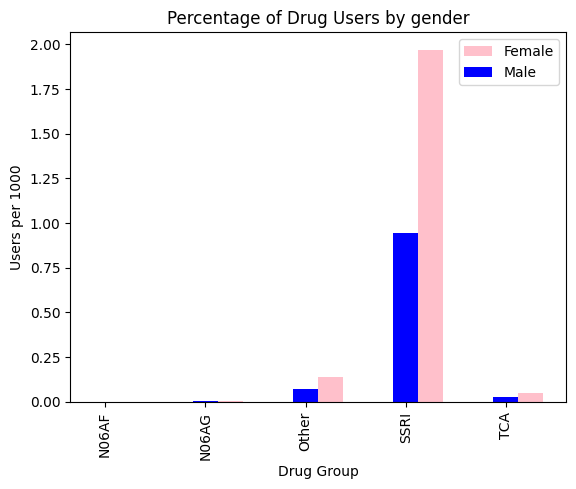

In [21]:
# Comparing the sex of those using different types of antidepressants
pivot_df = clean_data.pivot_table(values= 'users_pr_1000', index= 'drug_group', columns= 'sex')
pivot_df = pivot_df.fillna(0)

x_index = np.arange(len(pivot_df))
width = 0.25

plt.bar(x_index + width, pivot_df['F'], width=width, color='pink', label='Female')
plt.bar(x_index, pivot_df['M'], width=width, color='blue', label='Male')

plt.xticks(ticks=x_index, labels=pivot_df.index, rotation='vertical')

plt.xlabel('Drug Group')
plt.ylabel('Users per 1000')
plt.title('Percentage of Drug Users by gender')

plt.legend()
plt.show()

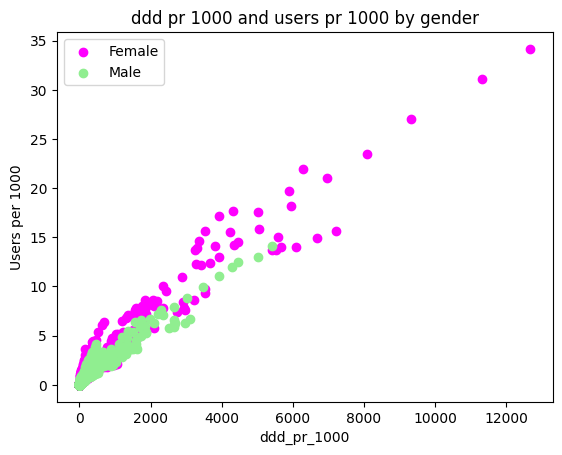

In [22]:
fig, ax = plt.subplots()

cs = ['lightgreen' if g == 'M' else 'magenta' for g in drug_use['sex']]

ax.scatter(x=clean_data[clean_data['sex'] == 'F']['ddd_pr_1000'],
           y=clean_data[clean_data['sex'] == 'F']['users_pr_1000'],
           c='magenta', label='Female')

ax.scatter(x=clean_data[clean_data['sex'] == 'M']['ddd_pr_1000'],
           y=clean_data[clean_data['sex'] == 'M']['users_pr_1000'],
           c='lightgreen', label='Male')

ax.set_xlabel('ddd_pr_1000')
ax.set_ylabel('Users per 1000')
ax.set_title('ddd pr 1000 and users pr 1000 by gender')
ax.legend()
plt.show()

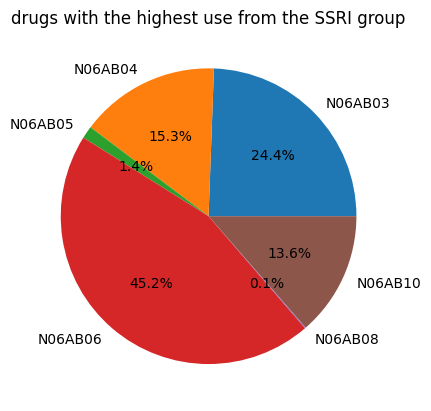

In [23]:
ssri_data = clean_data[clean_data['drug_group'] == 'SSRI']

atc_data = ssri_data.groupby('atc')['users_pr_1000'].sum()

# Extract the ATC names and corresponding user counts
atc_names = atc_data.index.tolist()
user_counts = atc_data.values.tolist()

plt.pie(user_counts, labels=atc_names, autopct='%1.1f%%')

plt.title('drugs with the highest use from the SSRI group')

plt.show()

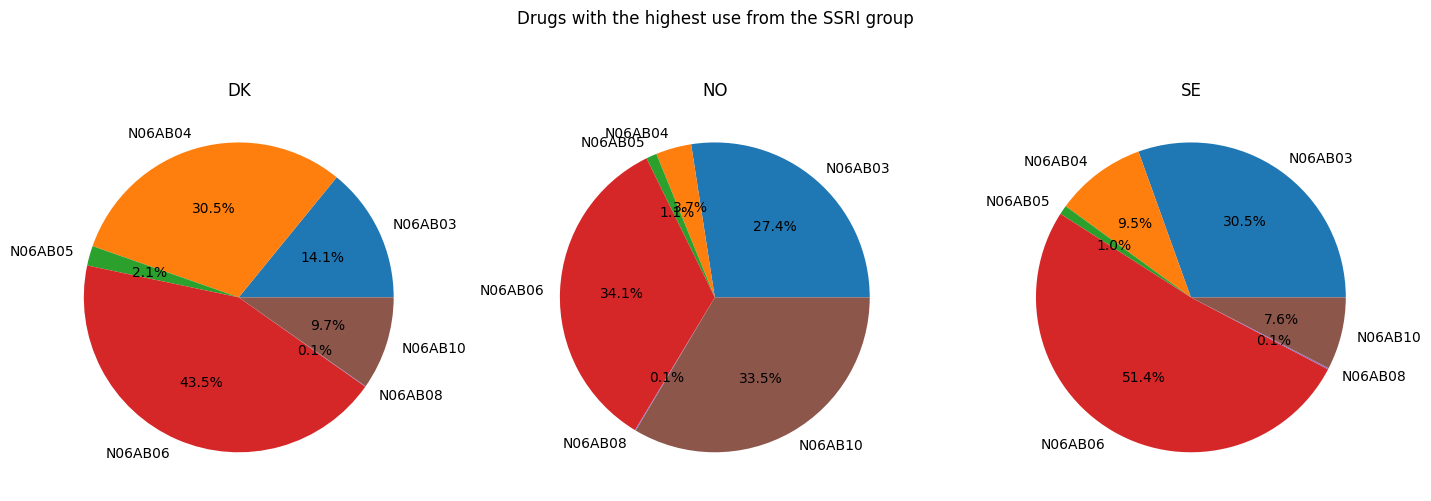

In [24]:
ssri_data = clean_data[clean_data['drug_group'] == 'SSRI']
countries = clean_data['country'].unique()

# Create subplots with 1 row and the number of countries columns
num_countries = len(countries)
fig, axes = plt.subplots(1, num_countries, figsize=(4.8*num_countries, 6))

# Iterate over each country and create a pie chart
for i, country in enumerate(countries):
    country_data = ssri_data[ssri_data['country'] == country]
    atc_data = country_data.groupby('atc')['users_pr_1000'].sum()

    # Extract the ATC names and corresponding user counts
    atc_names = atc_data.index.tolist()
    user_counts = atc_data.values.tolist()

    # Plot the pie chart on the corresponding subplot
    axes[i].pie(user_counts, labels=atc_names, autopct='%1.1f%%')
    axes[i].set_title(f'{country}')
    axes[i].tick_params(axis='both', labelsize=20)
    fig.tight_layout()

fig.suptitle('Drugs with the highest use from the SSRI group')
plt.show()